<a href="https://colab.research.google.com/github/toweliewang/Intelligent-Sensing-Sense-Making/blob/master/wk_signal_v3_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Workshop: *Human activity classification using wearable sensor data and wavelet-based signal analysis*

Course: NICF- Intelligent Sensing and Sense Making (SF)

Website: https://www.iss.nus.edu.sg/executive-education/course/detail/intelligent-sensing-and-sense-making/analytics-and-intelligent-systems

Contact: Tian Jing

Email: tianjing@nus.edu.sg

## Objective

In this workshop, we will perform following three tasks.
- Perform wavelet decomposition/reconstruction on signal
- Perform wavelet-based signal denoising
- Extract statistical features from wavelet coefficients from human wearable sensor data, and then perform classification for human activity classification

## Installation guideline

- Open `Anaconda Prompt`

- Append the channel `conda-forge` into your conda configuration.

`conda config --append channels conda-forge`

- Create a new virtual environment `issmv` or install additional packages in your own environment

`conda create -n issmv python=3.6 numpy=1.15.1 matplotlib=2.2.3 tensorflow=1.10.0 scipy=1.1.0 scikit-learn=0.19.1 spyder=3.3.2 yaml=0.1.7 keras=2.2.4 notebook=5.7.6 pandas=0.24.2 pywavelets=1.0.2`

- Activate the environment `issmv`

`conda activate issmv`

- Browse to the folder that contains the workshop files, then run jupyter notebook

`jupyter notebook`
    
- Reference: `PyWavelets` package

Reference: G. Lee, R. Gommers, F. Wasilewski, K. Wohlfahrt, A. O’Leary, H. Nahrstaedt, “PyWavelets - Wavelet Transforms in Python”, https://github.com/PyWavelets/pywt. The Help document of this tool is provided at https://pywavelets.readthedocs.io/en/latest/

## Submission guideline

Once you finish the workshop, rename your .ipynb file to your name, and submit your .ipynb file into LumiNUS.


In [0]:
# Load necessary packages
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pywt
import pandas as pd
import time
from sklearn.neural_network import MLPClassifier 
from sklearn.metrics import confusion_matrix
from warnings import filterwarnings # Avoid training warning message in MLPClassifier
filterwarnings('ignore')


# Exercise 1: 1D signal wavelet decomposition

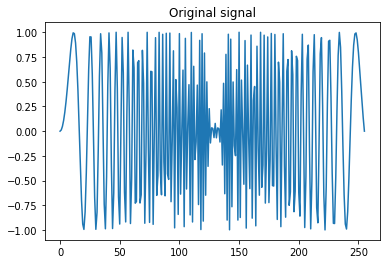

In [0]:
x = np.linspace(0, 1, num=256)
chirp_signal = np.sin(250 * np.pi * x**2)
    
plt.plot(chirp_signal)
plt.title('Original signal')
plt.show()


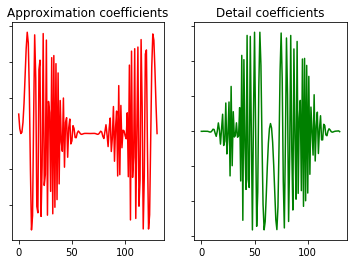

In [0]:
# Example: Perform wavelet decomposition on 1D data

# Step 1: Define input data and type of wavelet

# Data: Input data
data = chirp_signal
# waveletname: Type of wavelet
waveletname = 'db4'

# Step 2: Perform 1D wavelet decomposition
(data, coeff_d) = pywt.dwt(data, waveletname)

# Step 3: Perform drawing on your wavelet coefficients

fig, axarr = plt.subplots(nrows=1, ncols=2)
axarr[0].plot(data, 'r')
axarr[1].plot(coeff_d, 'g')
axarr[0].set_yticklabels([])
axarr[1].set_yticklabels([])
axarr[0].set_title("Approximation coefficients")
axarr[1].set_title("Detail coefficients")
plt.show()


# Exercise 2: Wavelet-based signal denoising

In [0]:
# Load data from Excel
df = pd.read_csv('data/test.csv', header=None)
signal_orig = df[0].values
plt.plot(signal_orig)
plt.title('Original data')
plt.show()
print(signal_orig.shape)


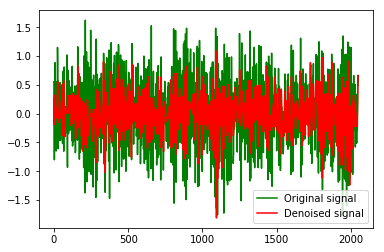

In [0]:
# Step 0: Configuration of wavelet decomposition

waveletname = 'db4'
waveletlevel = 2  # decomposit level

# Step 1: Perform wavelet decomposition

coeffs_orig = pywt.wavedec(signal_orig, waveletname, level=waveletlevel)
coeffs_filter = coeffs_orig.copy()

# Step 2: Perform thresholding on the wavelet coefficients

# Set the threshold
threshold = 0.8   # below set by 0.00

for i in range(1, len(coeffs_orig)):
    coeffs_filter[i] = pywt.threshold(coeffs_orig[i], threshold*max(coeffs_orig[i]))

# Step 3: Perform reconstruction on the filered coefficients

signal_denoised = pywt.waverec(coeffs_filter, waveletname)

# Step 4: Plot and compare the original signal and the denoised signal

plt.figure()
plt.plot(signal_orig, 'g', label='Original signal')
plt.plot(signal_denoised, 'r', label='Denoised signal')
plt.legend()
plt.show()


$\color{red}{\text{Q1. Complete the following code to perform wavelet decomposition.}}$

Tasks
- Generate a signal according to your interest (such as, linear/sine/cosine signal).
- Add Gaussian noise to your generated signal, by  adding a random Gaussian number with signal value
- Perform wavelet decomposition on your generated data `pywt.dwt()`
    - Evaluate the denoising performance using different levels of wavelet decomposition `waveletlevel` and different thresholds `threshold`
- Perform signal reconstruction using `pywt.waverec`
- Evaluate the Mean Square Error (MSE) performance by comparing your reconstrucuted signal with original signal
- Plot the original signal, noisy signal, denoised signal in the same figure, display the MSE performance.

Reference
- pywt.dwt(), https://pywavelets.readthedocs.io/en/latest/regression/dwt-idwt.html

- pywt.wavedec() https://pywavelets.readthedocs.io/en/latest/ref/dwt-discrete-wavelet-transform.html

- pywt.threshold() https://pywavelets.readthedocs.io/en/latest/ref/thresholding-functions.html

- pywt.waverec() https://pywavelets.readthedocs.io/en/latest/ref/idwt-inverse-discrete-wavelet-transform.html


In [0]:
# Provide your code here for Q1.
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pywt
import pandas as pd
import time
from sklearn.neural_network import MLPClassifier 
from sklearn.metrics import confusion_matrix
from warnings import filterwarnings # Avoid training warning message in MLPClassifier
filterwarnings('ignore')


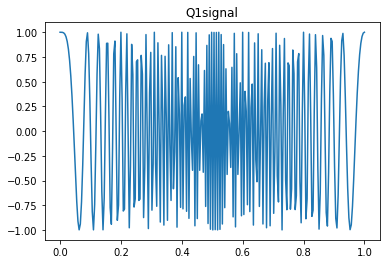

In [0]:
# Generate a signal according to your interest (such as, linear/sine/cosine signal).
x = np.linspace(0, 1, num=256)
chirp_signal = np.cos(250 * np.pi * x**2)
plt.title('Q1signal')
plt.plot(x, chirp_signal)
plt.show()

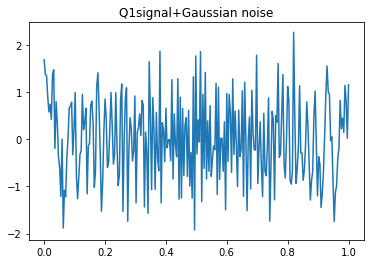

In [0]:
# Add Gaussian noise to your generated signal, by adding a random Gaussian number with signal value
import random
x = np.linspace(0, 1, num=256)
a = random.gauss(0,0.5)
chirp_signal = np.cos(250 * np.pi * (x)**2)
 
chirp_signal_noise = np.array([])
for i in chirp_signal:
  chirp_signal_noise = np.append(chirp_signal_noise,i + random.gauss(0,0.5)) 

plt.title('Q1signal+Gaussian noise')
plt.plot(x, chirp_signal_noise)
plt.show()

In [0]:
# Perform wavelet decomposition on your generated data pywt.dwt()
signal_orig = chirp_signal_noise

def get_signal_denoised(waveletlevel,threshold):
  waveletname = 'db4'
  coeffs_orig = pywt.wavedec(signal_orig, waveletname, level=waveletlevel)
  coeffs_filter = coeffs_orig.copy()
  for i in range(1, len(coeffs_orig)):
      coeffs_filter[i] = pywt.threshold(coeffs_orig[i], threshold*max(coeffs_orig[i]))
  signal_denoised = pywt.waverec(coeffs_filter, waveletname)
  return signal_denoised

signal_denoised = get_signal_denoised(3,0.5)
signal_denoised_2 = get_signal_denoised(10,0.5)
signal_denoised_3 = get_signal_denoised(3,0.2)
signal_denoised_4 = get_signal_denoised(3,0.8)

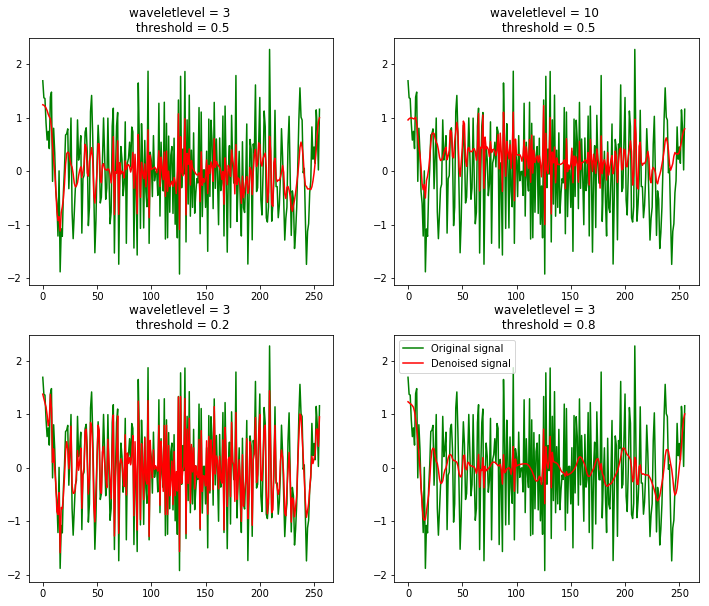

In [0]:
# Evaluate the denoising performance
plt.figure(figsize=(12,10))
plt.subplot(221)
plt.title('waveletlevel = 3 \n threshold = 0.5')
plt.plot(signal_orig, 'g', label='Original signal')
plt.plot(signal_denoised, 'r', label='Denoised signal')
plt.subplot(222)
plt.title('waveletlevel = 10 \n threshold = 0.5')
plt.plot(signal_orig, 'g', label='Original signal')
plt.plot(signal_denoised_2, 'r', label='Denoised signal')
plt.subplot(223)
plt.title('waveletlevel = 3 \n threshold = 0.2')
plt.plot(signal_orig, 'g', label='Original signal')
plt.plot(signal_denoised_3, 'r', label='Denoised signal')
plt.subplot(224)
plt.title('waveletlevel = 3 \n threshold = 0.8')
plt.plot(signal_orig, 'g', label='Original signal')
plt.plot(signal_denoised_4, 'r', label='Denoised signal')
plt.legend()
plt.show()

In [0]:
# Evaluate the Mean Square Error (MSE) performance by comparing your reconstrucuted signal with original signal
from sklearn import metrics 
mse = metrics.mean_squared_error(signal_orig,signal_denoised_3)
print(mse)

0.12029115691057582


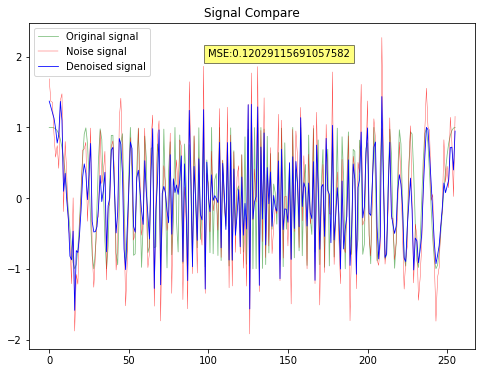

In [0]:
# Plot the original signal, noisy signal, denoised signal in the same figure, display the MSE performance
plt.figure(figsize=(8,6))
plt.title('Signal Compare')
plt.plot(chirp_signal, 'g', label='Original signal',alpha=0.5,linewidth=0.8)
plt.plot(chirp_signal_noise, 'r', label='Noise signal',alpha=0.8,linewidth=0.4)
plt.plot(signal_denoised_3, 'b', label='Denoised signal',alpha=1,linewidth=0.8)
# plt.text(x=100,y=1.25,s='f')
plt.text(100, 2, s = f'MSE:{mse}',fontsize=10, bbox=dict(facecolor='yellow', alpha=0.5))
plt.legend()
plt.show()

# Exercise 3: Human activity classification

**Dataset: UCI Human Activity Recognition Using Smartphones**

This dataset contains sensor data for 30 persons, each person performed six activities (WALKING, WALKING_UPSTAIRS, WALKING_DOWNSTAIRS, SITTING, STANDING, LAYING) wearing a smartphone (Samsung Galaxy S II) on the waist. Using its embedded accelerometer and gyroscope, 3-axial linear acceleration and 3-axial angular velocity are recorded at a constant rate of 50Hz.

Website: https://archive.ics.uci.edu/ml/datasets/Human+Activity+Recognition+Using+Smartphones


In [169]:
# Load training data and label, test data and label

def read_signals(filename):
    with open(filename, 'r') as fp:
        data = fp.read().splitlines()
        data = map(lambda x: x.rstrip().lstrip().split(), data)
        data = [list(map(float, line)) for line in data]
    return data

def read_labels(filename):        
    with open(filename, 'r') as fp:
        activities = fp.read().splitlines()
        activities = list(map(int, activities))
    return activities

def randomize(dataset, labels):
    permutation = np.random.permutation(labels.shape[0])
    shuffled_dataset = dataset[permutation, :, :]
    shuffled_labels = labels[permutation]
    return shuffled_dataset, shuffled_labels

INPUT_FOLDER_TRAIN = '/content/drive/My Drive/Colab Notebooks/day2 workshop/data/UCI_HAR/train/Inertial Signals/'
INPUT_FOLDER_TEST = '/content/drive/My Drive/Colab Notebooks/day2 workshop/data/UCI_HAR/test/Inertial Signals/'

INPUT_FILES_TRAIN = ['body_acc_x_train.txt', 'body_acc_y_train.txt', 'body_acc_z_train.txt', 
                     'body_gyro_x_train.txt', 'body_gyro_y_train.txt', 'body_gyro_z_train.txt',
                     'total_acc_x_train.txt', 'total_acc_y_train.txt', 'total_acc_z_train.txt']

INPUT_FILES_TEST = ['body_acc_x_test.txt', 'body_acc_y_test.txt', 'body_acc_z_test.txt', 
                     'body_gyro_x_test.txt', 'body_gyro_y_test.txt', 'body_gyro_z_test.txt',
                     'total_acc_x_test.txt', 'total_acc_y_test.txt', 'total_acc_z_test.txt']

LABELFILE_TRAIN = '/content/drive/My Drive/Colab Notebooks/day2 workshop/data/UCI_HAR/train/y_train.txt'
LABELFILE_TEST = '/content/drive/My Drive/Colab Notebooks/day2 workshop/data/UCI_HAR/test/y_test.txt'

train_signals, test_signals = [], []

for input_file in INPUT_FILES_TRAIN:
    signal = read_signals(INPUT_FOLDER_TRAIN + input_file)
    train_signals.append(signal)
train_signals = np.transpose(np.array(train_signals), (1, 2, 0))

for input_file in INPUT_FILES_TEST:
    signal = read_signals(INPUT_FOLDER_TEST + input_file)
    test_signals.append(signal)
test_signals = np.transpose(np.array(test_signals), (1, 2, 0))

train_labels = read_labels(LABELFILE_TRAIN)
test_labels = read_labels(LABELFILE_TEST)

print("The train dataset contains %d signals with %d length and %d components." % (train_signals.shape[0], train_signals.shape[1], train_signals.shape[2]))
print("The test dataset contains %s signals with %d length and %d components." % (test_signals.shape[0], test_signals.shape[1], test_signals.shape[2]))

uci_har_signals_train, uci_har_labels_train = randomize(train_signals, np.array(train_labels))
uci_har_signals_test, uci_har_labels_test = randomize(test_signals, np.array(test_labels))

activity_label = ['WALKING', 'UPSTAIRS', 'DOWNSTAIRS', 'SITTING', 'STANDING', 'LAYING']


The train dataset contains 7352 signals with 128 length and 9 components.
The test dataset contains 2947 signals with 128 length and 9 components.


In [0]:
# Define the feature extraction method for each subband
from collections import Counter 
import scipy

def general_indicator(list_values):
    mean = np.nanmean(list_values)
    std = np.nanstd(list_values)
    var = np.nanvar(list_values)
    rms = np.nanmean(np.sqrt(list_values**2))
    median = np.nanpercentile(list_values, 50)
    max_signal = np.nanmax(list_values)
    min_signal = np.nanmin(list_values)
    return [mean, std, var, rms, median, max_signal, min_signal]

def entropy_indicator(list_values):
  counter_values = Counter(list_values).most_common()
  probabilities = [elem[1]/len(list_values) for elem in counter_values]
  entropy=scipy.stats.entropy(probabilities)
  return [entropy]

def crossings_indicator(list_values):
  zero_crossing_indices = np.nonzero(np.diff(np.array(list_values) > 0))[0]
  no_zero_crossings = len(zero_crossing_indices)
  mean_crossing_indices = np.nonzero(np.diff(np.array(list_values) > np.nanmean(list_values)))[0]
  no_mean_crossings = len(mean_crossing_indices)
  return [no_zero_crossings, no_mean_crossings]


def calculate_statistics(list_values):
  general = general_indicator(list_values)
  entropy = entropy_indicator(list_values)
  crossing = crossings_indicator(list_values)
  return entropy + crossing + general


In [0]:
# Define feature extraction methods


def get_features(list_values):
    statistics = calculate_statistics(list_values)
    return statistics 

def get_uci_har_features(dataset, labels, waveletname):
    uci_har_features = []
    for signal_no in range(0, len(dataset)):
        
        if ((signal_no % 500) == 0):
            print('get_uci_har_features, loop %d/%d' % (signal_no, len(dataset)))
        features = []
        for signal_comp in range(0, dataset.shape[2]):
            signal = dataset[signal_no, :, signal_comp]
            list_coeff = pywt.wavedec(signal, waveletname)
            for coeff in list_coeff:          # 一维信号经过wavedec，n level后变成了list of array，从list array上取mean std var
                features += get_features(coeff)  # mean, std, var (joi coefficient) 分别来做appro & detail
        uci_har_features.append(features)
    X = np.array(uci_har_features)
    Y = np.array(labels)
    return X, Y


In [0]:
# Extract features for both train and test signals
start = time.time()

waveletname = 'db4'
print('Generate features for training data')
X_train, Y_train = get_uci_har_features(uci_har_signals_train, uci_har_labels_train, waveletname)

print('Generate features for training data')
X_test, Y_test = get_uci_har_features(uci_har_signals_test, uci_har_labels_test, waveletname)

end = time.time()
print('Time needed: %.2f seconds' % (end - start))


In [143]:
# Perform classification
# use the default setting of MLPClassifier, as classification method is not the focus of this course

clf = MLPClassifier() 
clf.fit(X_train, Y_train)
test_score = clf.score(X_test, Y_test)

print('Classification accuracy for test data set: %.4f' % test_score)

Y_predict = clf.predict(X_test)
print(pd.DataFrame(confusion_matrix(Y_test, Y_predict), index=activity_label, columns=activity_label))


Classification accuracy for test data set: 0.8802
            WALKING  UPSTAIRS  DOWNSTAIRS  SITTING  STANDING  LAYING
WALKING         422        13          61        0         0       0
UPSTAIRS         10       421          38        2         0       0
DOWNSTAIRS       42        41         336        1         0       0
SITTING           0         5           0      388        93       5
STANDING          0         0           0       31       501       0
LAYING            0        11           0        0         0     526


$\color{red}{\text{Q2. Perform statistical feature extractions from wavelet coefficients.}}$


Tasks
- Modify the function *calculate_statistics()* to include new statistics as features.

- Apply your new statistical features to perform human activity classification.

- Display the accuracy performance and confusion matrix of your new approach


In [188]:
# Provide your solution to Q2 here
#
#
# Your modified calculate_statistics() function
from collections import Counter 
import scipy

def general_indicator(list_values):
    mean = np.nanmean(list_values)
    std = np.nanstd(list_values)
    var = np.nanvar(list_values)
    rms = np.nanmean(np.sqrt(list_values**2))
    median = np.nanpercentile(list_values, 50)
    max_signal = np.nanmax(list_values)
    min_signal = np.nanmin(list_values)
    return [mean, std, var, rms, median, max_signal, min_signal]

def entropy_indicator(list_values):
  counter_values = Counter(list_values).most_common()
  probabilities = [elem[1]/len(list_values) for elem in counter_values]
  entropy=scipy.stats.entropy(probabilities)
  return [entropy]

def crossings_indicator(list_values):
  zero_crossing_indices = np.nonzero(np.diff(np.array(list_values) > 0))[0]
  no_zero_crossings = len(zero_crossing_indices)
  mean_crossing_indices = np.nonzero(np.diff(np.array(list_values) > np.nanmean(list_values)))[0]
  no_mean_crossings = len(mean_crossing_indices)
  return [no_zero_crossings, no_mean_crossings]


def calculate_statistics(list_values):
  general = general_indicator(list_values)
  entropy = entropy_indicator(list_values)
  crossing = crossings_indicator(list_values)
  return entropy + crossing + general

# Extract features for both train and test signals
start = time.time()

waveletname = 'db4'
print('Generate features for training data')
X_train, Y_train = get_uci_har_features(uci_har_signals_train, uci_har_labels_train, waveletname)

print('Generate features for training data')
X_test, Y_test = get_uci_har_features(uci_har_signals_test, uci_har_labels_test, waveletname)

end = time.time()
print('Time needed: %.2f seconds' % (end - start))

Generate features for training data
get_uci_har_features, loop 0/7352
get_uci_har_features, loop 500/7352
get_uci_har_features, loop 1000/7352
get_uci_har_features, loop 1500/7352
get_uci_har_features, loop 2000/7352
get_uci_har_features, loop 2500/7352
get_uci_har_features, loop 3000/7352
get_uci_har_features, loop 3500/7352
get_uci_har_features, loop 4000/7352
get_uci_har_features, loop 4500/7352
get_uci_har_features, loop 5000/7352
get_uci_har_features, loop 5500/7352
get_uci_har_features, loop 6000/7352
get_uci_har_features, loop 6500/7352
get_uci_har_features, loop 7000/7352
Generate features for training data
get_uci_har_features, loop 0/2947
get_uci_har_features, loop 500/2947
get_uci_har_features, loop 1000/2947
get_uci_har_features, loop 1500/2947
get_uci_har_features, loop 2000/2947
get_uci_har_features, loop 2500/2947
Time needed: 224.49 seconds


In [189]:
# Perform classification using the default setting of MLPClassifier
# Display the classifier performance

clf = MLPClassifier() 
clf.fit(X_train, Y_train)
test_score = clf.score(X_test, Y_test)

print('Classification accuracy for test data set: %.4f' % test_score)

Y_predict = clf.predict(X_test)
print(pd.DataFrame(confusion_matrix(Y_test, Y_predict), index=activity_label, columns=activity_label))


Classification accuracy for test data set: 0.9104
            WALKING  UPSTAIRS  DOWNSTAIRS  SITTING  STANDING  LAYING
WALKING         472         8          16        0         0       0
UPSTAIRS          5       445          21        0         0       0
DOWNSTAIRS       11        42         364        0         3       0
SITTING           0         2           0      427        62       0
STANDING          0         0           0       75       457       0
LAYING            0         7           0        0        12     518



**Once you finish the workshop, rename your .ipynb file to your name, and submit your .ipynb file into LumiNUS.**

Have a nice day!